In [1]:
# upload the data from .xslx files
import pandas as pd
Dataset_WF_site1 = pd.read_excel(r'data_original/wind_farms/Wind farm site 1 (Nominal capacity-99MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site2 = pd.read_excel(r'data_original/wind_farms/Wind farm site 2 (Nominal capacity-200MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site3 = pd.read_excel(r'data_original/wind_farms/Wind farm site 3 (Nominal capacity-99MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site4 = pd.read_excel(r'data_original/wind_farms/Wind farm site 4 (Nominal capacity-66MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site5 = pd.read_excel(r'data_original/wind_farms/Wind farm site 5 (Nominal capacity-36MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site6 = pd.read_excel(r'data_original/wind_farms/Wind farm site 6 (Nominal capacity-96MW).xlsx'
                                ).drop(index=0)

In [11]:
Dataset_WF_site6.shape



(70175, 13)

In [14]:
Dataset_WF_site2.tail()

,Time(year-month-day h:m:s),Wind speed at height of 10 meters (m/s),Wind direction at height of 10 meters (˚),Wind speed at height of 30 meters (m/s),Wind direction at height of 30 meters (˚),Wind speed at height of 50 meters (m/s),Wind direction at height of 50 meters (˚),Wind speed - at the height of wheel hub (m/s),Wind speed - at the height of wheel hub (˚),Air temperature (°C),Atmosphere (hpa),Relative humidity (%),Power (MW)
70171,2020-12-31 22:45:00,2.518,123.296,2.747,103.838,2.518,89.739,2.874,94.430,-12.889,887.686,33.022,0.045933
70172,2020-12-31 23:00:00,0.840,100.233,2.302,89.572,2.724,80.741,2.592,93.190,-13.337,887.717,33.023,0.080467
70173,2020-12-31 23:15:00,0.409,86.624,1.727,103.470,2.288,94.421,2.237,97.814,-13.889,887.464,33.014,0.000000
70174,2020-12-31 23:30:00,0.037,114.375,1.168,99.424,1.523,85.928,1.778,89.808,-13.543,887.282,33.007,0.000000
70175,2020-12-31 23:45:00,1.080,131.694,1.421,99.528,1.219,86.036,1.574,90.939,-12.931,887.150,33.002,0.008467


In [15]:
for dataset in [Dataset_WF_site1, Dataset_WF_site2, Dataset_WF_site3, Dataset_WF_site4, Dataset_WF_site5, Dataset_WF_site6]:
    dataset.columns=['time','WS_10','WD_10','WS_30','WD_30','WS_50','WD_50','WS_cen','WD_cen','Air_T','Air_P','Air_H','Power(MW)']

In [16]:
Dataset_WF_site1.head()

,time,WS_10,WD_10,WS_30,WD_30,WS_50,WD_50,WS_cen,WD_cen,Air_T,Air_P,Air_H,Power(MW)
1,2019-01-01 00:15:00,1.828,77.460,1.698,75.048,1.757,88.733,1.882,74.367,-13.691,889.575,76.757,0.329703
2,2019-01-01 00:30:00,2.193,86.700,2.313,84.688,2.344,89.100,2.350,NaN,-13.766,889.942,76.981,0.296306
3,2019-01-01 00:45:00,2.654,78.160,2.494,74.939,2.574,87.267,2.808,82.733,-13.691,889.675,76.821,0.187590
4,2019-01-01 01:00:00,2.249,94.297,2.192,91.140,2.558,96.900,2.924,92.967,-13.447,890.025,74.571,0.081005
5,2019-01-01 01:15:00,1.974,92.933,1.980,91.921,2.049,97.000,2.137,100.133,-13.983,889.692,71.808,0.189721


In [17]:
Dataset_WF_site3['Air_T'].value_counts()

 26.460    11194
 0.000       429
 25.250       58
 14.810       58
 11.960       56
           ...  
-0.907         1
-7.390         1
 2.131         1
 3.772         1
 5.151         1
Name: Air_T, Length: 10938, dtype: int64

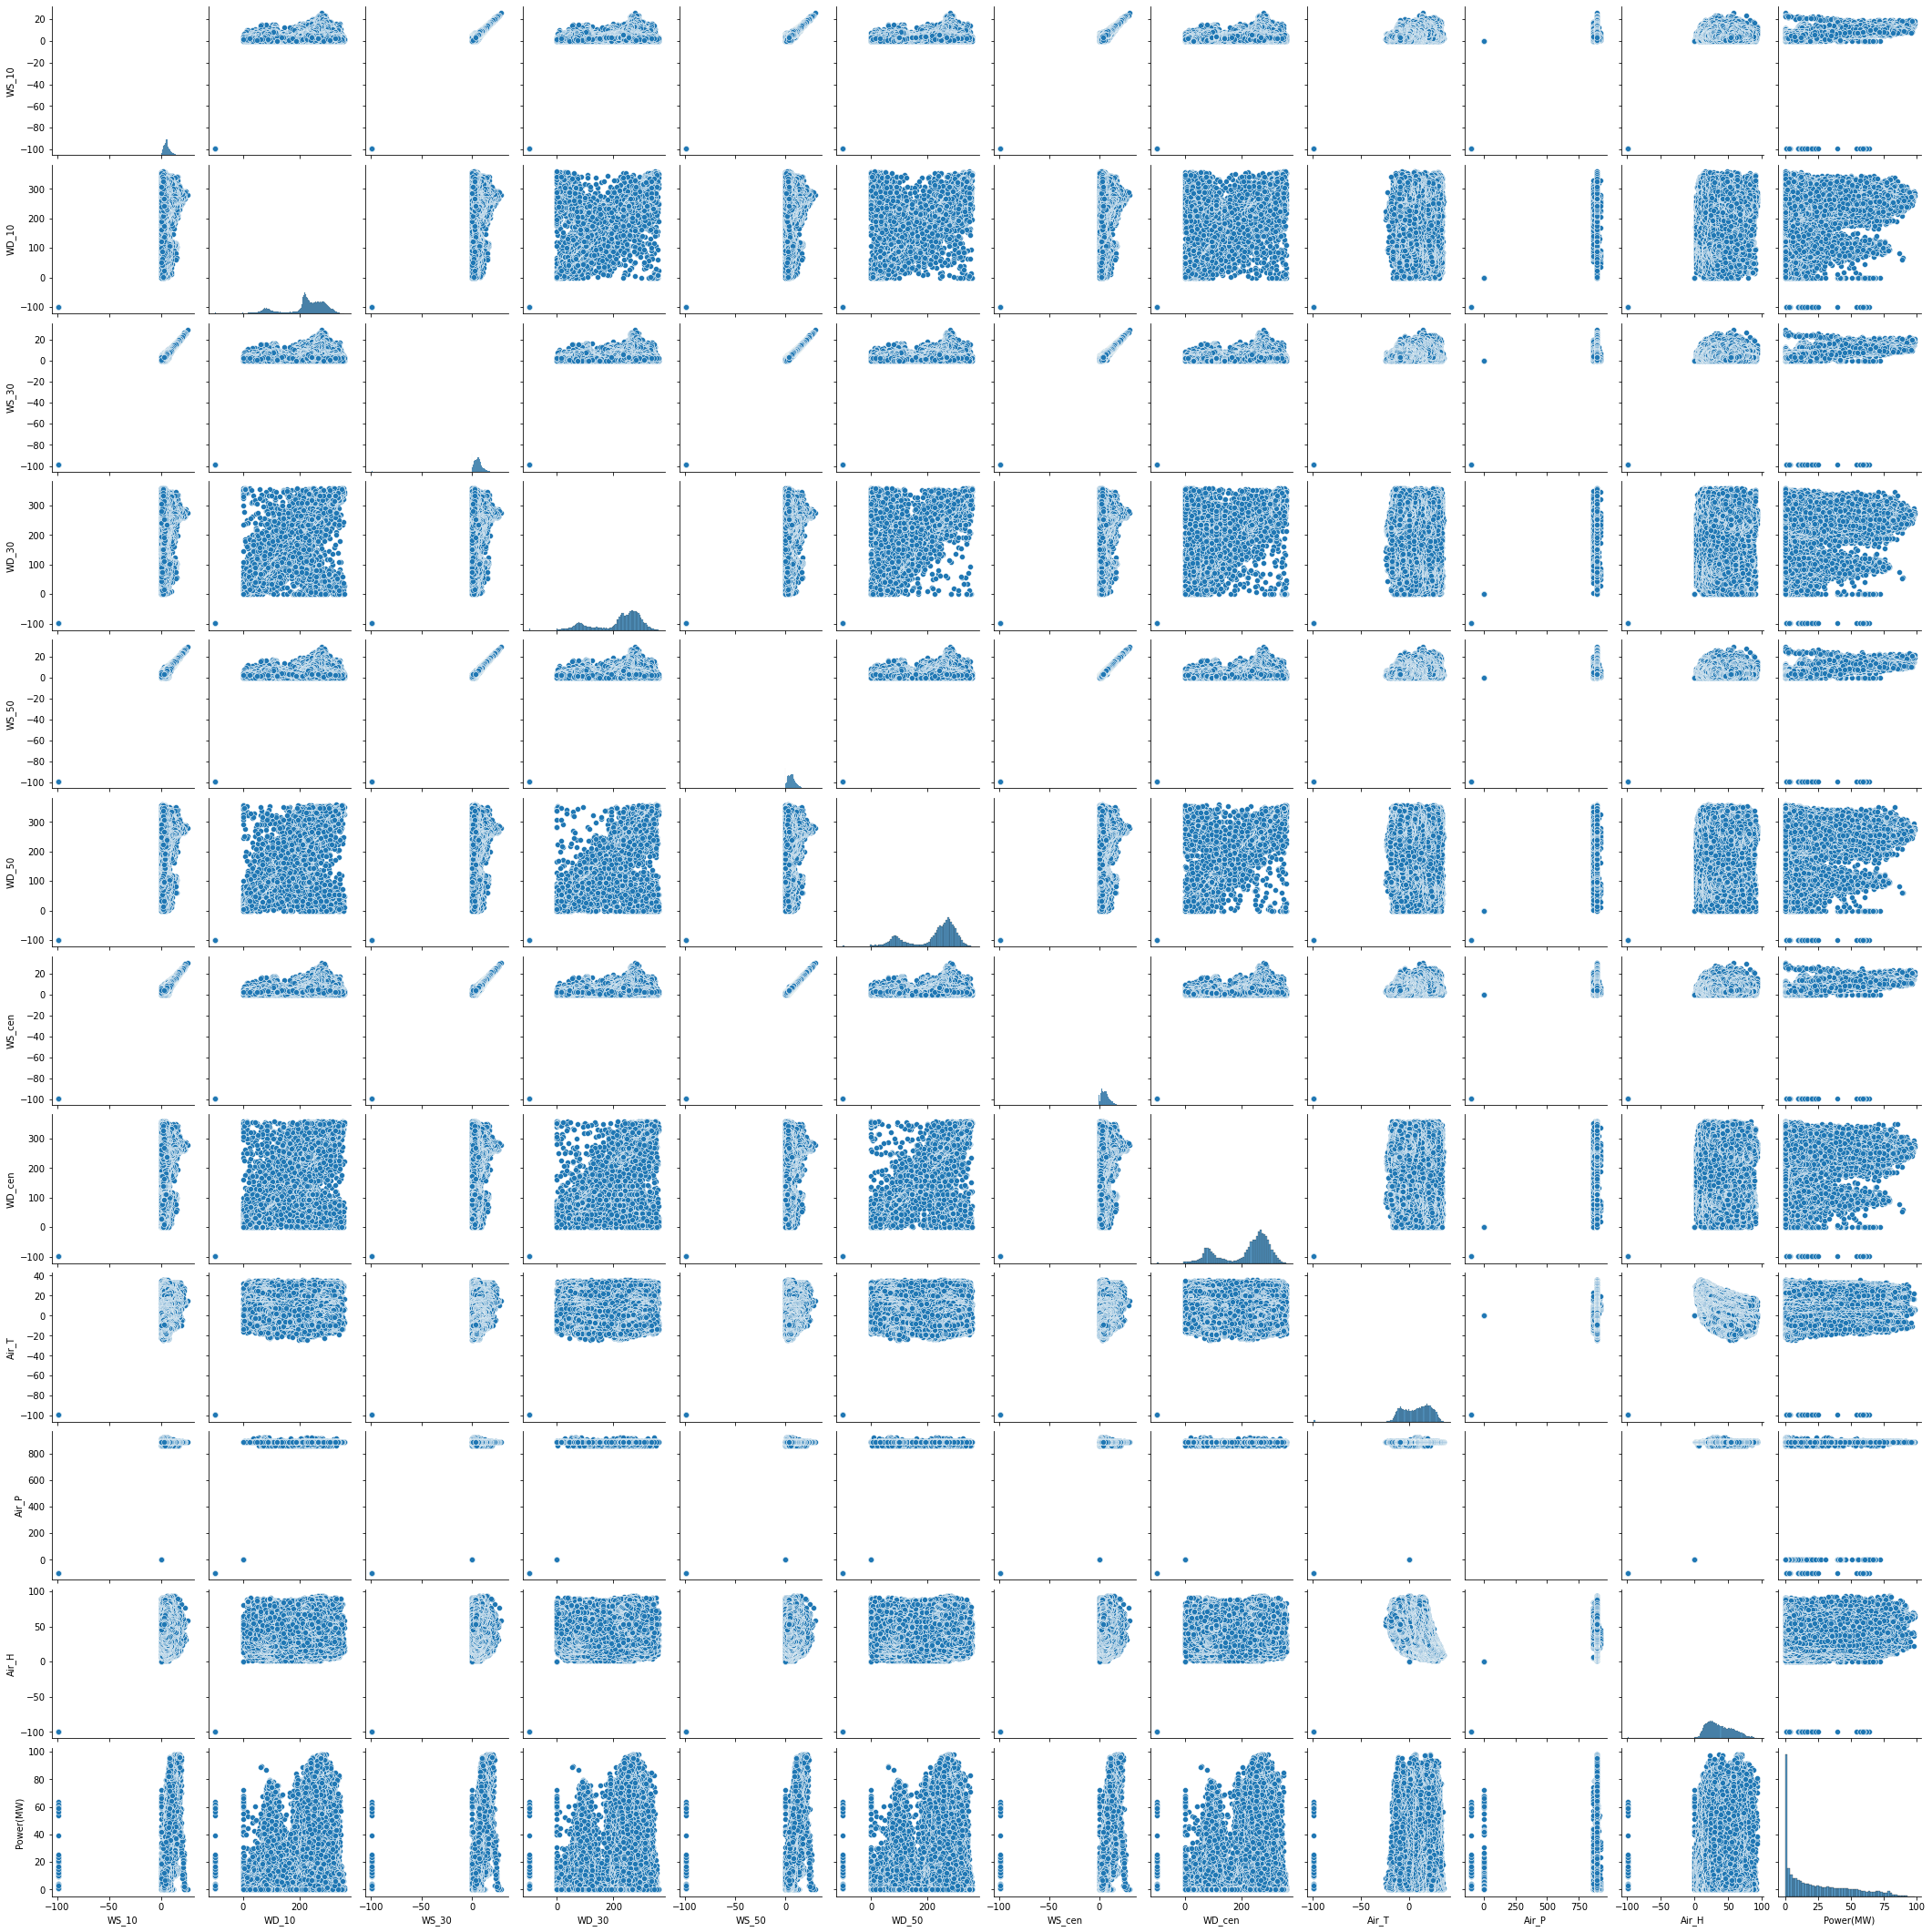

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(Dataset_WF_site1, hue=None, height=2.5)
plt.savefig('./time vs Power(10days)')

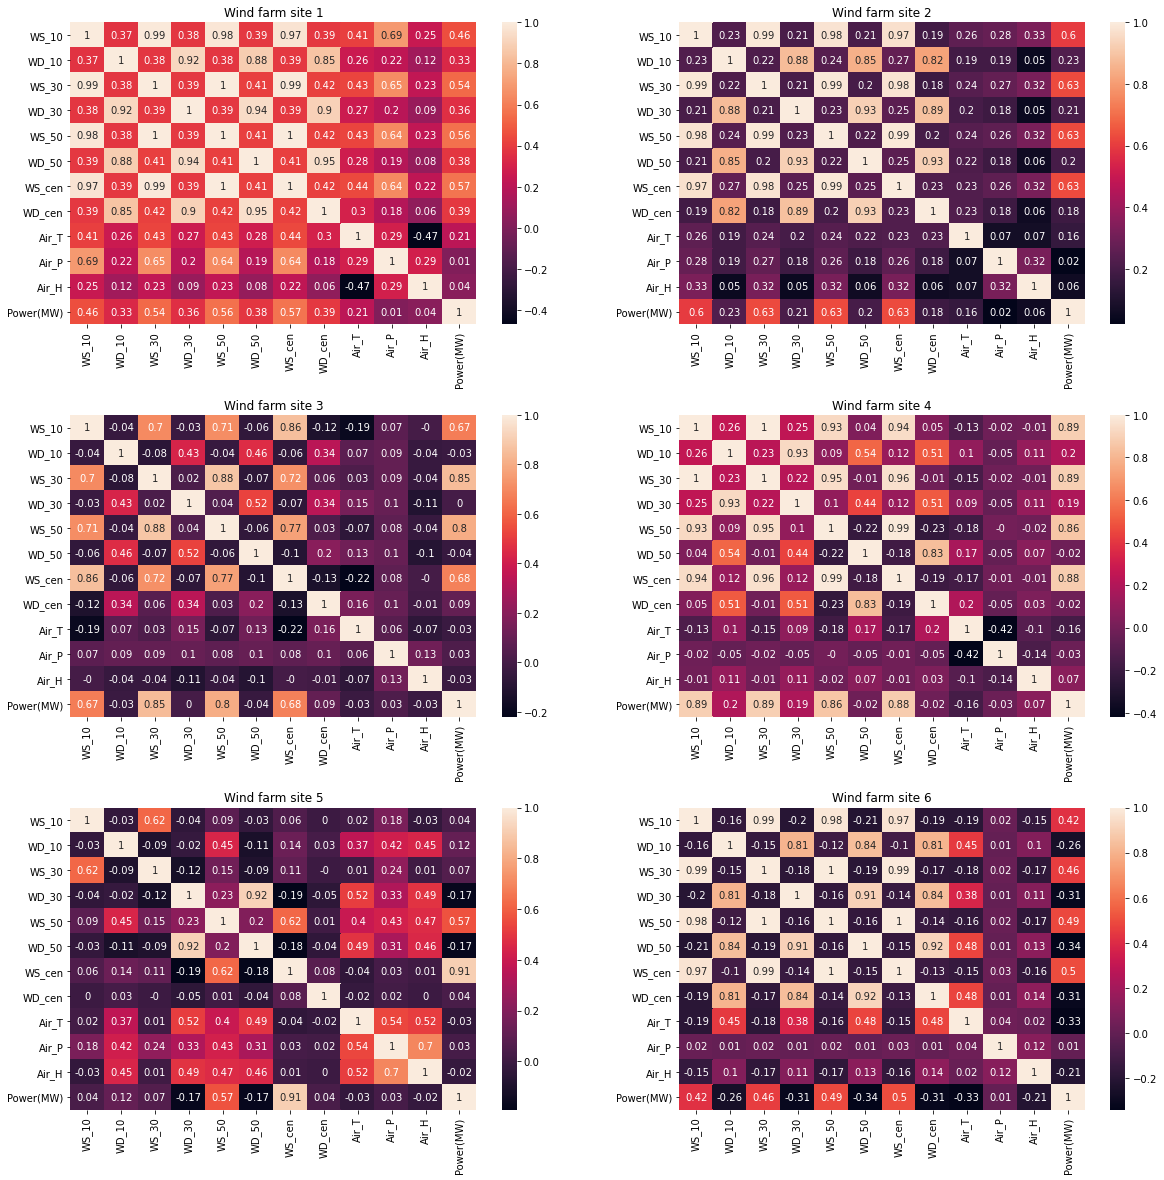

In [51]:
from matplotlib import pyplot as plt
import math
from pylab import *
fig, axes = plt.subplots(3,2, figsize=(20,20))
plt.subplots_adjust(hspace=0.3)
for data, i in zip([Dataset_WF_site1, Dataset_WF_site2, Dataset_WF_site3, Dataset_WF_site4, Dataset_WF_site5, Dataset_WF_site6],
                  range(6)):
    sns.heatmap(data.corr().round(2),annot=True, ax=axes[math.floor(i/2)][i%2]).set(title=f'Wind farm site {i+1}')
plt.savefig('./Heatmap Wind farms')


In [20]:
Dataset_WF_site1.describe()

,WS_10,WD_10,WS_30,WD_30,WS_50,WD_50,WS_cen,WD_cen,Air_T,Air_P,Air_H,Power(MW)
count,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70174.000000,70175.000000,70175.000000,70175.000000,70175.000000
mean,5.495330,221.831657,5.820167,219.626008,5.949541,220.833647,6.156744,215.953807,8.311066,886.416702,37.259772,23.408677
std,5.593026,75.459688,5.947895,81.442186,6.062657,84.634982,6.091303,86.850855,14.170329,54.362745,19.868037,24.120787
min,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.000000
25%,3.512500,208.993000,3.264000,189.562500,3.154000,164.883500,3.266000,140.433000,-3.321000,889.542000,22.192000,1.571063
50%,5.372000,235.753000,5.760000,245.197000,5.780000,251.600000,5.849000,248.567000,9.733000,889.742000,34.309000,14.939664
75%,7.208000,275.053000,8.083500,277.486000,8.372000,281.367000,8.593000,279.233000,19.706000,889.925000,51.531000,40.174018
max,25.465000,358.987000,29.187000,359.087000,29.678000,358.933000,30.247000,358.500000,36.130000,918.192000,93.120000,98.094440


In [21]:
Dataset_WF_site2.describe()

,WS_10,WD_10,WS_30,WD_30,WS_50,WD_50,WS_cen,WD_cen,Air_T,Air_P,Air_H,Power(MW)
count,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000
mean,6.227269,217.613551,7.058625,216.522537,7.297982,208.742419,7.455671,206.799319,8.614907,877.413412,33.266920,72.681263
std,4.929299,87.071233,5.329943,89.759781,5.467425,87.357356,5.657089,87.002253,13.509332,72.377016,7.989529,55.720435
min,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.000000
25%,3.028000,135.873000,3.436000,123.346000,3.516000,114.619500,3.359000,114.138000,-3.450000,880.570000,32.776000,14.006667
50%,6.470000,248.660000,7.288000,265.591000,7.525000,256.751000,7.631000,243.134000,10.274000,884.022000,32.908000,75.365135
75%,9.108000,296.019500,10.142000,295.088000,10.453000,285.056500,10.770000,283.763000,19.956500,887.528500,33.056000,124.271572
max,23.300000,359.916000,27.125000,360.000000,28.196000,359.889000,28.808000,359.802000,37.590000,900.450000,97.580000,201.248080


In [22]:
Dataset_WF_site3.describe()

,WS_10,WD_10,WS_30,WD_30,WS_50,WD_50,WS_cen,WD_cen,Air_T,Air_P,Air_H,Power(MW)
count,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000
mean,3.578818,147.778862,5.362724,144.527297,4.925062,142.485414,4.026941,179.064245,17.432691,967.344083,58.476032,18.143409
std,3.344739,98.089484,2.974323,88.615511,3.248179,93.527037,3.304053,110.535447,9.913799,65.844573,23.847390,22.637217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-115.600000,-92.496000,0.000000,-0.668767
25%,0.000000,78.989750,3.172330,58.426450,2.661000,55.244200,1.069000,116.939500,10.280000,966.195000,39.460700,0.613344
50%,3.148000,148.200000,4.934000,162.100000,4.570000,149.400000,3.837000,165.100000,20.480000,971.731000,56.859800,8.346660
75%,5.712000,182.489000,7.097000,198.714500,6.915000,180.581000,5.984670,289.400000,26.460000,976.933000,77.078000,27.929300
max,27.926000,360.000000,22.091700,360.000000,21.836000,360.000000,36.920300,360.000000,36.320000,990.731000,356.915000,94.266600


In [23]:
Dataset_WF_site4.describe()

,WS_10,WD_10,WS_30,WD_30,WS_50,WD_50,WS_cen,WD_cen,Air_T,Air_P,Air_H,Power(MW)
count,69595.000000,69595.000000,69595.000000,69595.000000,69595.000000,69595.000000,69595.000000,69595.000000,69595.000000,69591.000000,69591.000000,70175.000000
mean,3.769937,193.483803,4.201010,205.466641,5.357891,149.694387,5.519398,147.282406,13.787090,886.796983,80.722520,17.353567
std,2.393151,95.201015,2.667345,97.910286,3.794063,116.933437,3.869677,120.702058,8.175931,6.389708,18.778354,19.991634
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.820000,0.000000,0.000000,0.000000
25%,2.080667,137.020000,2.298945,140.941500,2.624667,17.110000,2.710000,20.653333,6.571333,883.000000,68.901000,0.521333
50%,3.256667,176.454667,3.663333,189.912667,4.470000,163.440000,4.632000,151.184000,14.210000,887.000000,85.620000,7.319333
75%,5.137166,280.946666,5.760000,314.398500,7.382667,232.213333,7.680000,236.161667,20.466667,890.800000,97.640000,32.676834
max,17.744000,356.600000,20.406667,357.000000,30.819333,356.900000,31.086000,356.800000,35.253333,902.000000,100.000000,64.614000


In [24]:
Dataset_WF_site5.describe()

,WS_10,WD_10,WS_30,WD_30,WS_50,WD_50,WS_cen,WD_cen,Air_T,Air_P,Air_H,Power(MW)
count,69595.000000,69595.000000,69595.000000,69595.000000,69595.000000,69595.000000,69595.000000,69595.000000,69595.000000,69591.000000,69591.000000,70175.000000
mean,0.191816,159.850937,0.307057,118.351600,4.206048,106.761587,4.687807,184.951185,13.562778,718.114713,69.890851,6.680921
std,1.468699,109.270150,1.270607,108.809869,3.223955,104.126441,3.138261,113.059887,8.889410,317.395392,32.159644,10.063849
min,-272.640000,-0.900000,-0.900000,-0.900000,-0.900000,-0.900000,0.000000,0.000000,-9.920000,0.000000,0.000000,0.000000
25%,0.000000,75.611666,0.000000,31.986667,1.826667,17.966667,2.493333,82.733333,5.600000,810.180000,57.360000,0.000000
50%,0.000000,150.546667,0.000000,85.713333,3.960000,70.666667,3.960000,191.066667,14.160000,817.200000,78.900000,1.719333
75%,0.000000,264.256666,0.000000,206.700000,7.000000,201.636666,6.040000,283.800000,21.200000,823.560000,96.720000,8.315667
max,52.180000,357.000000,40.646667,356.933333,24.046667,356.900000,26.166667,358.600000,35.753333,2110.486667,101.000000,35.350667


In [25]:
Dataset_WF_site6.describe()

,WS_10,WD_10,WS_30,WD_30,WS_50,WD_50,WS_cen,WD_cen,Air_T,Air_P,Air_H,Power(MW)
count,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000
mean,4.846964,99.588791,6.418888,70.859260,7.237401,87.262655,7.945149,93.605931,21.153492,1087.993412,78.634512,28.719653
std,5.270371,94.236207,5.617629,80.338424,5.832331,89.374626,5.983422,91.514978,6.420355,18.830682,10.927824,28.112274
min,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000,-99.000000
25%,2.920000,34.990000,4.140000,17.820000,4.790000,28.220000,5.390000,33.740000,15.270000,1088.250000,71.580000,3.482000
50%,4.910000,46.000000,6.480000,35.170000,7.340000,38.980000,8.080000,44.980000,21.410000,1088.250000,79.820000,20.039000
75%,7.090000,207.405000,8.950000,132.100000,9.980000,187.810000,10.860000,194.325000,27.430000,1088.920000,87.040000,48.936000
max,15.280000,359.950000,19.710000,359.990000,21.810000,360.000000,23.820000,360.000000,37.130000,1090.240000,99.380000,114.360000


# The analysis of the solar stations

In [52]:
import pandas as pd
Dataset_SS_site1 = pd.read_excel(r'data_original/solar_stations/Solar station site 1 (Nominal capacity-50MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site2 = pd.read_excel(r'data_original/solar_stations/Solar station site 2 (Nominal capacity-130MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site3 = pd.read_excel(r'data_original/solar_stations/Solar station site 3 (Nominal capacity-30MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site4 = pd.read_excel(r'data_original/solar_stations/Solar station site 4 (Nominal capacity-130MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site5 = pd.read_excel(r'data_original/solar_stations/Solar station site 5 (Nominal capacity-110MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site6 = pd.read_excel(r'data_original/solar_stations/Solar station site 6 (Nominal capacity-35MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site7 = pd.read_excel(r'data_original/solar_stations/Solar station site 7 (Nominal capacity-30MW).xlsx'
                                ).drop(index=0)
Dataset_SS_site8 = pd.read_excel(r'data_original/solar_stations/Solar station site 8 (Nominal capacity-30MW).xlsx'
                                ).drop(index=0)

In [53]:
Dataset_SS_site1.head()
Dataset_SS_site3.drop(columns=['Unnamed: 8','Unnamed: 9'], inplace=True)
Dataset_SS_site4.drop(columns=['Unnamed: 8','Unnamed: 9'], inplace=True)
Dataset_SS_site5.drop(columns=['Unnamed: 8'], inplace=True)
Dataset_SS_site6.drop(columns=['Unnamed: 8','Unnamed: 9'], inplace=True)
Dataset_SS_site7.drop(columns=['Unnamed: 8','Unnamed: 9'], inplace=True)

In [54]:
for dataset in [Dataset_SS_site1, Dataset_SS_site2, Dataset_SS_site3, Dataset_SS_site4
                , Dataset_SS_site5, Dataset_SS_site6, Dataset_SS_site7, Dataset_SS_site8]:
    dataset.columns=['time','TSI','DNI','GHI','Air_T','Air_P','Air_H','Power(MW)']

In [56]:

Dataset_SS_site1.isnull().sum()

time         0
TSI          0
DNI          0
GHI          0
Air_T        0
Air_P        0
Air_H        0
Power(MW)    0
dtype: int64

In [57]:
Dataset_SS_site5.replace('--', 'NaN', inplace=True)
Dataset_SS_site6.replace('<NULL>', 'NaN', inplace=True)
Dataset_SS_site7.replace('<NULL>', 'NaN', inplace=True)

In [58]:
for dataset in [Dataset_SS_site5, Dataset_SS_site6, Dataset_SS_site7]:
    for tile in ['TSI','DNI','GHI','Air_T','Air_P','Air_H','Power(MW)']:
        dataset[tile]= dataset[tile].astype('float')

In [59]:
Dataset_SS_site5.dropna(how='any', inplace=True)
Dataset_SS_site5.loc[10310:10315,:]


,time,TSI,DNI,GHI,Air_T,Air_P,Air_H,Power(MW)
10311,2019-04-18 09:45:00,761.0,650.0,629.0,28.0,1002.1,46.5,65.58
10312,2019-04-18 10:00:00,797.0,674.0,662.0,28.5,1002.4,43.6,69.85
10313,2019-04-18 10:15:00,763.0,658.0,627.0,29.5,1002.4,41.5,66.78
10314,2019-04-18 10:30:00,778.0,682.0,649.0,29.2,1002.4,40.9,71.11
10315,2019-04-18 10:45:00,913.0,746.0,757.0,29.5,1002.3,37.8,77.25


In [60]:
'--' in Dataset_SS_site5

False

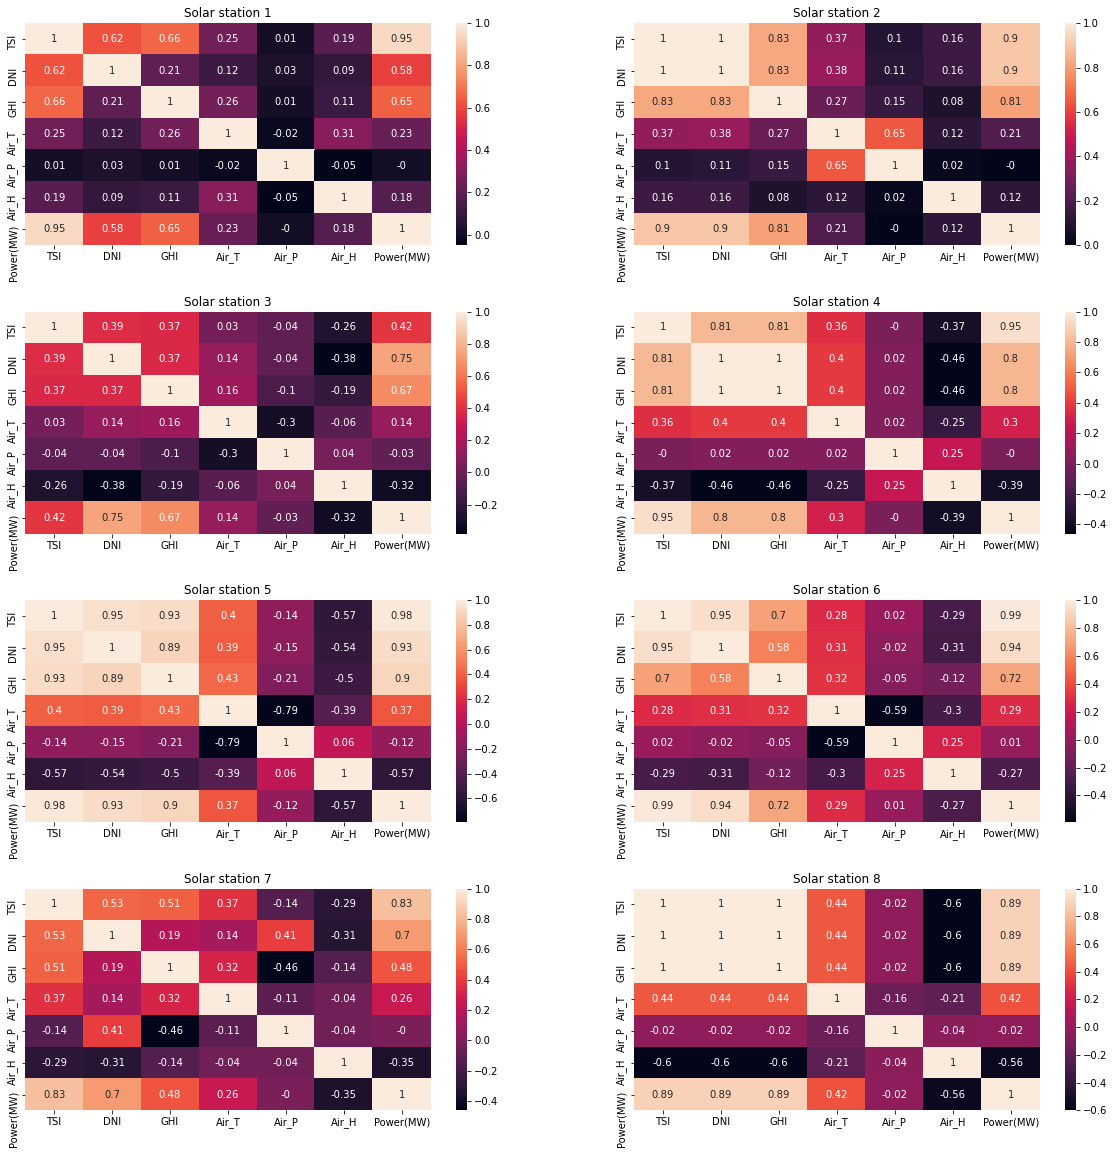

In [61]:
from matplotlib import pyplot as plt
import seaborn as sns
import math
fig, axes = plt.subplots(4,2, figsize=(20,20))
plt.subplots_adjust(hspace=0.3)
for data, i in zip([Dataset_SS_site1, Dataset_SS_site2, Dataset_SS_site3, Dataset_SS_site4,
                   Dataset_SS_site5, Dataset_SS_site6, Dataset_SS_site7, Dataset_SS_site8],
                  range(8)):
    sns.heatmap(data.corr().round(2), annot=True, ax=axes[math.floor(i/2)][i%2]).set(title=f'Solar station {i+1}')
plt.savefig('./Heatmap Solar Stations')

In [76]:
Dataset_SS_site1.describe()

,TSI,DNI,GHI,Air_T,Air_P,Air_H,Power(MW)
count,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000
mean,266.054792,93.162793,67.554799,13.043021,912.507327,650.708540,9.669554
std,367.988978,200.824889,111.273641,14.701874,30.852741,1924.401663,13.705224
min,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,905.700000,9.100000,0.000000
50%,5.000000,1.000000,4.000000,15.000000,913.300000,21.000000,0.000000
75%,540.000000,36.000000,97.000000,25.300000,920.200000,43.800000,18.794767
max,1359.000000,980.000000,989.000000,41.200000,936.300000,6553.500000,48.321730


In [77]:
Dataset_SS_site2.describe()

,TSI,DNI,GHI,Air_T,Air_P,Air_H,Power(MW)
count,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000
mean,166.877878,120.123934,76.545118,12.541831,851.305793,140.405659,19.571845
std,248.559725,179.654689,118.381022,16.465360,96.270905,845.995944,27.953038
min,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.000000
25%,0.000000,0.000000,0.000000,2.590000,856.050000,12.490000,0.241033
50%,0.000000,0.000000,0.000000,15.310000,860.710000,22.280000,0.326900
75%,301.285000,217.375000,127.810000,23.515000,865.310000,36.620000,36.837965
max,1041.930000,751.750000,561.800000,40.470000,881.670000,6553.440000,109.360300


In [78]:
Dataset_SS_site3.describe()

,TSI,DNI,GHI,Air_T,Air_P,Air_H,Power(MW)
count,52607.000000,52607.000000,52607.000000,52607.000000,52607.000000,52607.000000,52607.000000
mean,81.145066,111.118045,66.331021,-302.466005,1017.751468,62.309177,5.210698
std,205.787260,199.060539,98.934843,971.912657,13.007963,20.215797,8.077812
min,0.000000,0.000000,0.000000,-3276.700000,0.000000,0.000000,-0.063000
25%,0.000000,0.000000,0.000000,4.800000,1009.800000,53.400000,-0.037800
50%,1.625960,0.000000,0.000000,13.800000,1018.500000,64.300000,0.000000
75%,19.914300,158.000000,109.000000,22.000000,1025.300000,72.600000,8.399176
max,1117.000000,893.000000,656.000000,3276.700000,1044.400000,3276.700000,29.911340


In [79]:
Dataset_SS_site4.describe()

,TSI,DNI,GHI,Air_T,Air_P,Air_H,Power(MW)
count,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70175.000000,70169.000000
mean,150.119329,138.924310,20.757523,18.643439,1005.786380,65.888652,16.468785
std,253.452714,210.610850,31.471394,10.346082,81.625668,17.902952,27.475618
min,0.000000,0.000000,0.000000,-5.318736,0.000000,0.000000,-0.440000
25%,0.000000,0.000000,0.000000,9.598074,985.289955,53.829586,-0.244000
50%,0.000000,0.000000,0.000000,19.209491,1010.915692,66.466217,0.078000
75%,193.725000,228.008623,34.070254,26.507946,1036.400064,78.818797,21.944000
max,1237.400000,1010.272565,150.960268,49.799619,1100.310562,100.000000,114.688000


In [80]:
Dataset_SS_site5.describe()

,TSI,DNI,GHI,Air_T,Air_P,Air_H,Power(MW)
count,70129.000000,70129.000000,70129.000000,70129.000000,70129.000000,70129.000000,70129.000000
mean,164.309972,147.861669,115.010523,17.775689,1011.978763,71.607654,14.488901
std,273.444449,234.911440,203.063208,9.631098,10.651783,15.610198,23.864632
min,0.000000,0.000000,0.000000,-6.600000,0.000000,0.000000,-0.540000
25%,0.000000,0.000000,0.000000,9.200000,1003.000000,64.100000,-0.230000
50%,0.000000,1.000000,0.000000,18.600000,1012.200000,77.200000,0.000000
75%,213.000000,221.000000,139.000000,25.500000,1020.000000,82.900000,19.600000
max,1467.000000,1962.000000,1208.000000,39.500000,1039.400000,93.200000,99.550000


In [81]:
Dataset_SS_site6.describe()

,TSI,DNI,GHI,Air_T,Air_P,Air_H,Power(MW)
count,69601.000000,69601.000000,69601.000000,69601.000000,69601.000000,69601.000000,70175.000000
mean,244.071942,216.036650,54.095768,20.642915,830.662369,53.952920,6.368606
std,355.921489,338.037296,69.398777,5.758462,4.624626,23.884506,9.170257
min,0.000000,0.000000,0.000000,2.946667,389.820000,1.413333,0.000000
25%,0.000000,0.000000,0.000000,16.573334,827.873350,34.346670,0.000000
50%,0.200000,0.000000,0.000000,20.686666,830.406700,52.473330,0.000000
75%,446.900000,438.000000,105.600000,24.600000,833.290000,72.200000,11.779666
max,1365.400000,1179.800000,296.200000,36.693333,846.073300,97.900000,31.239334


In [82]:
Dataset_SS_site7.describe()

,TSI,DNI,GHI,Air_T,Air_P,Air_H,Power(MW)
count,69594.000000,69594.000000,69594.000000,69594.000000,69615.000000,69594.000000,70175.000000
mean,207.249414,173.795442,102.776273,13.756985,841.973869,55.160106,5.412000
std,345.848759,377.024185,269.434809,6.035518,83.145337,23.943926,8.044945
min,-17865.800000,-21449.800000,-6399.800000,-110.341333,-6910.000000,-47.824000,0.000000
25%,0.000000,0.000000,0.000000,9.408000,821.700000,35.506167,0.000000
50%,3.066667,0.000000,2.466667,14.376000,854.413333,54.833333,0.000000
75%,364.925000,265.600000,134.200000,18.048964,856.750000,74.315250,9.585333
max,30654.733333,1095.400000,13568.000000,189.520000,867.100000,108.354000,29.775333


In [83]:
Dataset_SS_site8.describe()

,TSI,DNI,GHI,Air_T,Air_P,Air_H,Power(MW)
count,69407.000000,69407.000000,69407.000000,69407.000000,69407.000000,69407.000000,69407.000000
mean,163.246279,142.024277,21.222013,18.009867,956.419377,71.705991,4.230725
std,245.395035,213.493689,31.901357,8.562121,30.535353,18.502999,6.517454
min,0.000000,0.000000,0.000000,-8.040000,881.400000,11.830000,0.000000
25%,0.000000,0.000000,0.000000,11.370000,932.300000,59.266255,0.000000
50%,0.000000,0.000000,0.000000,18.190000,956.070000,73.530000,0.000000
75%,271.055000,235.820000,35.235000,24.246687,980.090000,85.994455,6.440000
max,1214.540000,1056.650339,157.890281,47.630000,1037.780000,100.000000,29.410000


In [62]:
X = Dataset_SS_site1.drop(['Power(MW)','time',],axis='columns')
y = Dataset_SS_site1['Power(MW)']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [63]:
import xgboost as xgb
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [64]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
model = xgb.XGBRegressor(n_estimators=2000, eta=0.05)
# define model evaluation method
evalset = [(X_train, y_train), (X_test,y_test)]
model.fit(X_train,y_train, eval_metric='logloss', eval_set=evalset)


[0]	validation_0-logloss:-318.08893	validation_1-logloss:-320.56168
[1]	validation_0-logloss:-332.87277	validation_1-logloss:-336.53449
[2]	validation_0-logloss:-334.76584	validation_1-logloss:-338.49161
[3]	validation_0-logloss:-336.28332	validation_1-logloss:-339.81638
[4]	validation_0-logloss:-336.58539	validation_1-logloss:-340.11990
[5]	validation_0-logloss:-336.77246	validation_1-logloss:-340.30347
[6]	validation_0-logloss:-336.85471	validation_1-logloss:-340.37152
[7]	validation_0-logloss:-336.92267	validation_1-logloss:-340.45868
[8]	validation_0-logloss:-337.13153	validation_1-logloss:-340.64477
[9]	validation_0-logloss:-337.67328	validation_1-logloss:-341.28854
[10]	validation_0-logloss:-337.70032	validation_1-logloss:-341.30075
[11]	validation_0-logloss:-337.70648	validation_1-logloss:-341.31122
[12]	validation_0-logloss:-337.71600	validation_1-logloss:-341.31885
[13]	validation_0-logloss:-337.73526	validation_1-logloss:-341.32776
[14]	validation_0-logloss:-337.74088	validat

[119]	validation_0-logloss:-337.89148	validation_1-logloss:-341.48746
[120]	validation_0-logloss:-337.89148	validation_1-logloss:-341.48743
[121]	validation_0-logloss:-337.88800	validation_1-logloss:-341.48557
[122]	validation_0-logloss:-337.88745	validation_1-logloss:-341.48431
[123]	validation_0-logloss:-337.88745	validation_1-logloss:-341.48428
[124]	validation_0-logloss:-337.89081	validation_1-logloss:-341.48608
[125]	validation_0-logloss:-337.88693	validation_1-logloss:-341.48404
[126]	validation_0-logloss:-337.88663	validation_1-logloss:-341.48379
[127]	validation_0-logloss:-337.88650	validation_1-logloss:-341.47958
[128]	validation_0-logloss:-337.88648	validation_1-logloss:-341.48145
[129]	validation_0-logloss:-337.88654	validation_1-logloss:-341.48273
[130]	validation_0-logloss:-337.88672	validation_1-logloss:-341.48193
[131]	validation_0-logloss:-337.88638	validation_1-logloss:-341.48178
[132]	validation_0-logloss:-337.88638	validation_1-logloss:-341.48175
[133]	validation_0-l

[237]	validation_0-logloss:-337.88178	validation_1-logloss:-341.47748
[238]	validation_0-logloss:-337.88178	validation_1-logloss:-341.47748
[239]	validation_0-logloss:-337.88187	validation_1-logloss:-341.47644
[240]	validation_0-logloss:-337.88184	validation_1-logloss:-341.47644
[241]	validation_0-logloss:-337.88187	validation_1-logloss:-341.47644
[242]	validation_0-logloss:-337.88178	validation_1-logloss:-341.47745
[243]	validation_0-logloss:-337.88178	validation_1-logloss:-341.47745
[244]	validation_0-logloss:-337.88178	validation_1-logloss:-341.47745
[245]	validation_0-logloss:-337.88205	validation_1-logloss:-341.47730
[246]	validation_0-logloss:-337.88211	validation_1-logloss:-341.47635
[247]	validation_0-logloss:-337.88208	validation_1-logloss:-341.47144
[248]	validation_0-logloss:-337.88208	validation_1-logloss:-341.47150
[249]	validation_0-logloss:-337.88293	validation_1-logloss:-341.47260
[250]	validation_0-logloss:-337.88330	validation_1-logloss:-341.47269
[251]	validation_0-l

[355]	validation_0-logloss:-337.88422	validation_1-logloss:-341.47470
[356]	validation_0-logloss:-337.88425	validation_1-logloss:-341.47470
[357]	validation_0-logloss:-337.88422	validation_1-logloss:-341.47470
[358]	validation_0-logloss:-337.88425	validation_1-logloss:-341.47433
[359]	validation_0-logloss:-337.88422	validation_1-logloss:-341.47357
[360]	validation_0-logloss:-337.88422	validation_1-logloss:-341.47360
[361]	validation_0-logloss:-337.88434	validation_1-logloss:-341.47333
[362]	validation_0-logloss:-337.88434	validation_1-logloss:-341.47333
[363]	validation_0-logloss:-337.88434	validation_1-logloss:-341.47339
[364]	validation_0-logloss:-337.88446	validation_1-logloss:-341.47455
[365]	validation_0-logloss:-337.88449	validation_1-logloss:-341.47461
[366]	validation_0-logloss:-337.88446	validation_1-logloss:-341.47461
[367]	validation_0-logloss:-337.88446	validation_1-logloss:-341.47348
[368]	validation_0-logloss:-337.88455	validation_1-logloss:-341.47455
[369]	validation_0-l

[473]	validation_0-logloss:-337.88119	validation_1-logloss:-341.46408
[474]	validation_0-logloss:-337.88123	validation_1-logloss:-341.46408
[475]	validation_0-logloss:-337.88123	validation_1-logloss:-341.46381
[476]	validation_0-logloss:-337.88077	validation_1-logloss:-341.46399
[477]	validation_0-logloss:-337.88074	validation_1-logloss:-341.46487
[478]	validation_0-logloss:-337.88074	validation_1-logloss:-341.46402
[479]	validation_0-logloss:-337.88068	validation_1-logloss:-341.46475
[480]	validation_0-logloss:-337.88034	validation_1-logloss:-341.46555
[481]	validation_0-logloss:-337.88019	validation_1-logloss:-341.46555
[482]	validation_0-logloss:-337.88019	validation_1-logloss:-341.46551
[483]	validation_0-logloss:-337.88016	validation_1-logloss:-341.46551
[484]	validation_0-logloss:-337.88040	validation_1-logloss:-341.46399
[485]	validation_0-logloss:-337.88040	validation_1-logloss:-341.46426
[486]	validation_0-logloss:-337.88074	validation_1-logloss:-341.46423
[487]	validation_0-l

[591]	validation_0-logloss:-337.88004	validation_1-logloss:-341.45139
[592]	validation_0-logloss:-337.88019	validation_1-logloss:-341.45126
[593]	validation_0-logloss:-337.88022	validation_1-logloss:-341.45126
[594]	validation_0-logloss:-337.87961	validation_1-logloss:-341.45126
[595]	validation_0-logloss:-337.87961	validation_1-logloss:-341.45123
[596]	validation_0-logloss:-337.87936	validation_1-logloss:-341.45120
[597]	validation_0-logloss:-337.87946	validation_1-logloss:-341.45236
[598]	validation_0-logloss:-337.87946	validation_1-logloss:-341.45236
[599]	validation_0-logloss:-337.88000	validation_1-logloss:-341.45230
[600]	validation_0-logloss:-337.88000	validation_1-logloss:-341.45230
[601]	validation_0-logloss:-337.88004	validation_1-logloss:-341.45224
[602]	validation_0-logloss:-337.87973	validation_1-logloss:-341.45252
[603]	validation_0-logloss:-337.88025	validation_1-logloss:-341.45248
[604]	validation_0-logloss:-337.88019	validation_1-logloss:-341.45245
[605]	validation_0-l

[709]	validation_0-logloss:-337.87799	validation_1-logloss:-341.44580
[710]	validation_0-logloss:-337.87799	validation_1-logloss:-341.44580
[711]	validation_0-logloss:-337.87802	validation_1-logloss:-341.44580
[712]	validation_0-logloss:-337.87796	validation_1-logloss:-341.44574
[713]	validation_0-logloss:-337.87830	validation_1-logloss:-341.44574
[714]	validation_0-logloss:-337.87830	validation_1-logloss:-341.44574
[715]	validation_0-logloss:-337.87891	validation_1-logloss:-341.44565
[716]	validation_0-logloss:-337.87875	validation_1-logloss:-341.44565
[717]	validation_0-logloss:-337.87872	validation_1-logloss:-341.44550
[718]	validation_0-logloss:-337.87872	validation_1-logloss:-341.44550
[719]	validation_0-logloss:-337.87872	validation_1-logloss:-341.44553
[720]	validation_0-logloss:-337.87875	validation_1-logloss:-341.44550
[721]	validation_0-logloss:-337.87872	validation_1-logloss:-341.44553
[722]	validation_0-logloss:-337.87872	validation_1-logloss:-341.44550
[723]	validation_0-l

[827]	validation_0-logloss:-337.87683	validation_1-logloss:-341.42950
[828]	validation_0-logloss:-337.87683	validation_1-logloss:-341.42950
[829]	validation_0-logloss:-337.87683	validation_1-logloss:-341.42950
[830]	validation_0-logloss:-337.87689	validation_1-logloss:-341.42953
[831]	validation_0-logloss:-337.87689	validation_1-logloss:-341.42953
[832]	validation_0-logloss:-337.87692	validation_1-logloss:-341.42935
[833]	validation_0-logloss:-337.87692	validation_1-logloss:-341.42935
[834]	validation_0-logloss:-337.87692	validation_1-logloss:-341.42935
[835]	validation_0-logloss:-337.87692	validation_1-logloss:-341.42941
[836]	validation_0-logloss:-337.87747	validation_1-logloss:-341.42935
[837]	validation_0-logloss:-337.87747	validation_1-logloss:-341.42935
[838]	validation_0-logloss:-337.87744	validation_1-logloss:-341.42981
[839]	validation_0-logloss:-337.87744	validation_1-logloss:-341.42978
[840]	validation_0-logloss:-337.87744	validation_1-logloss:-341.42978
[841]	validation_0-l

[945]	validation_0-logloss:-337.87796	validation_1-logloss:-341.42819
[946]	validation_0-logloss:-337.87824	validation_1-logloss:-341.42819
[947]	validation_0-logloss:-337.87766	validation_1-logloss:-341.42819
[948]	validation_0-logloss:-337.87711	validation_1-logloss:-341.42819
[949]	validation_0-logloss:-337.87711	validation_1-logloss:-341.42819
[950]	validation_0-logloss:-337.87775	validation_1-logloss:-341.42801
[951]	validation_0-logloss:-337.87759	validation_1-logloss:-341.42801
[952]	validation_0-logloss:-337.87759	validation_1-logloss:-341.42801
[953]	validation_0-logloss:-337.87766	validation_1-logloss:-341.42868
[954]	validation_0-logloss:-337.87759	validation_1-logloss:-341.42868
[955]	validation_0-logloss:-337.87799	validation_1-logloss:-341.42856
[956]	validation_0-logloss:-337.87790	validation_1-logloss:-341.42792
[957]	validation_0-logloss:-337.87784	validation_1-logloss:-341.42786
[958]	validation_0-logloss:-337.87784	validation_1-logloss:-341.42786
[959]	validation_0-l

[1062]	validation_0-logloss:-337.88034	validation_1-logloss:-341.43161
[1063]	validation_0-logloss:-337.88037	validation_1-logloss:-341.43161
[1064]	validation_0-logloss:-337.88034	validation_1-logloss:-341.43161
[1065]	validation_0-logloss:-337.88037	validation_1-logloss:-341.43161
[1066]	validation_0-logloss:-337.88040	validation_1-logloss:-341.43155
[1067]	validation_0-logloss:-337.88156	validation_1-logloss:-341.43155
[1068]	validation_0-logloss:-337.88156	validation_1-logloss:-341.43155
[1069]	validation_0-logloss:-337.88156	validation_1-logloss:-341.43155
[1070]	validation_0-logloss:-337.88156	validation_1-logloss:-341.43155
[1071]	validation_0-logloss:-337.88159	validation_1-logloss:-341.43155
[1072]	validation_0-logloss:-337.88159	validation_1-logloss:-341.43155
[1073]	validation_0-logloss:-337.88159	validation_1-logloss:-341.43155
[1074]	validation_0-logloss:-337.88184	validation_1-logloss:-341.43155
[1075]	validation_0-logloss:-337.88184	validation_1-logloss:-341.43155
[1076]

[1178]	validation_0-logloss:-337.88202	validation_1-logloss:-341.42529
[1179]	validation_0-logloss:-337.88199	validation_1-logloss:-341.42529
[1180]	validation_0-logloss:-337.88208	validation_1-logloss:-341.42529
[1181]	validation_0-logloss:-337.88193	validation_1-logloss:-341.42529
[1182]	validation_0-logloss:-337.88193	validation_1-logloss:-341.42554
[1183]	validation_0-logloss:-337.88190	validation_1-logloss:-341.42554
[1184]	validation_0-logloss:-337.88190	validation_1-logloss:-341.42554
[1185]	validation_0-logloss:-337.88199	validation_1-logloss:-341.42529
[1186]	validation_0-logloss:-337.88193	validation_1-logloss:-341.42526
[1187]	validation_0-logloss:-337.88208	validation_1-logloss:-341.42526
[1188]	validation_0-logloss:-337.88193	validation_1-logloss:-341.42526
[1189]	validation_0-logloss:-337.88190	validation_1-logloss:-341.42551
[1190]	validation_0-logloss:-337.88187	validation_1-logloss:-341.42548
[1191]	validation_0-logloss:-337.88168	validation_1-logloss:-341.42483
[1192]

[1294]	validation_0-logloss:-337.88040	validation_1-logloss:-341.42566
[1295]	validation_0-logloss:-337.88046	validation_1-logloss:-341.42426
[1296]	validation_0-logloss:-337.88046	validation_1-logloss:-341.42426
[1297]	validation_0-logloss:-337.88043	validation_1-logloss:-341.42426
[1298]	validation_0-logloss:-337.88043	validation_1-logloss:-341.42426
[1299]	validation_0-logloss:-337.88037	validation_1-logloss:-341.42468
[1300]	validation_0-logloss:-337.88040	validation_1-logloss:-341.42477
[1301]	validation_0-logloss:-337.88040	validation_1-logloss:-341.42477
[1302]	validation_0-logloss:-337.88095	validation_1-logloss:-341.42429
[1303]	validation_0-logloss:-337.88004	validation_1-logloss:-341.42426
[1304]	validation_0-logloss:-337.88058	validation_1-logloss:-341.42429
[1305]	validation_0-logloss:-337.88058	validation_1-logloss:-341.42429
[1306]	validation_0-logloss:-337.88052	validation_1-logloss:-341.42426
[1307]	validation_0-logloss:-337.88058	validation_1-logloss:-341.42426
[1308]

[1410]	validation_0-logloss:-337.87811	validation_1-logloss:-341.41818
[1411]	validation_0-logloss:-337.87808	validation_1-logloss:-341.41818
[1412]	validation_0-logloss:-337.87805	validation_1-logloss:-341.41812
[1413]	validation_0-logloss:-337.87866	validation_1-logloss:-341.41659
[1414]	validation_0-logloss:-337.87885	validation_1-logloss:-341.41653
[1415]	validation_0-logloss:-337.87881	validation_1-logloss:-341.41641
[1416]	validation_0-logloss:-337.87881	validation_1-logloss:-341.41638
[1417]	validation_0-logloss:-337.87869	validation_1-logloss:-341.41647
[1418]	validation_0-logloss:-337.87869	validation_1-logloss:-341.41647
[1419]	validation_0-logloss:-337.87869	validation_1-logloss:-341.41647
[1420]	validation_0-logloss:-337.87869	validation_1-logloss:-341.41641
[1421]	validation_0-logloss:-337.87839	validation_1-logloss:-341.41635
[1422]	validation_0-logloss:-337.87842	validation_1-logloss:-341.41638
[1423]	validation_0-logloss:-337.87866	validation_1-logloss:-341.41635
[1424]

[1526]	validation_0-logloss:-337.87744	validation_1-logloss:-341.42270
[1527]	validation_0-logloss:-337.87744	validation_1-logloss:-341.42374
[1528]	validation_0-logloss:-337.87732	validation_1-logloss:-341.42377
[1529]	validation_0-logloss:-337.87732	validation_1-logloss:-341.42383
[1530]	validation_0-logloss:-337.87732	validation_1-logloss:-341.42383
[1531]	validation_0-logloss:-337.87726	validation_1-logloss:-341.42380
[1532]	validation_0-logloss:-337.87732	validation_1-logloss:-341.42310
[1533]	validation_0-logloss:-337.87759	validation_1-logloss:-341.42294
[1534]	validation_0-logloss:-337.87756	validation_1-logloss:-341.42288
[1535]	validation_0-logloss:-337.87698	validation_1-logloss:-341.42282
[1536]	validation_0-logloss:-337.87744	validation_1-logloss:-341.42282
[1537]	validation_0-logloss:-337.87753	validation_1-logloss:-341.42288
[1538]	validation_0-logloss:-337.87701	validation_1-logloss:-341.42297
[1539]	validation_0-logloss:-337.87701	validation_1-logloss:-341.42297
[1540]

[1642]	validation_0-logloss:-337.88034	validation_1-logloss:-341.42895
[1643]	validation_0-logloss:-337.88037	validation_1-logloss:-341.42892
[1644]	validation_0-logloss:-337.88037	validation_1-logloss:-341.42798
[1645]	validation_0-logloss:-337.88031	validation_1-logloss:-341.42801
[1646]	validation_0-logloss:-337.88031	validation_1-logloss:-341.42804
[1647]	validation_0-logloss:-337.88031	validation_1-logloss:-341.42804
[1648]	validation_0-logloss:-337.88031	validation_1-logloss:-341.42801
[1649]	validation_0-logloss:-337.88031	validation_1-logloss:-341.42801
[1650]	validation_0-logloss:-337.88025	validation_1-logloss:-341.42801
[1651]	validation_0-logloss:-337.88025	validation_1-logloss:-341.42801
[1652]	validation_0-logloss:-337.88025	validation_1-logloss:-341.42804
[1653]	validation_0-logloss:-337.88022	validation_1-logloss:-341.42804
[1654]	validation_0-logloss:-337.88046	validation_1-logloss:-341.42804
[1655]	validation_0-logloss:-337.88046	validation_1-logloss:-341.42804
[1656]

[1758]	validation_0-logloss:-337.88236	validation_1-logloss:-341.42535
[1759]	validation_0-logloss:-337.88236	validation_1-logloss:-341.42532
[1760]	validation_0-logloss:-337.88236	validation_1-logloss:-341.42529
[1761]	validation_0-logloss:-337.88236	validation_1-logloss:-341.42529
[1762]	validation_0-logloss:-337.88236	validation_1-logloss:-341.42529
[1763]	validation_0-logloss:-337.88236	validation_1-logloss:-341.42529
[1764]	validation_0-logloss:-337.88229	validation_1-logloss:-341.42532
[1765]	validation_0-logloss:-337.88202	validation_1-logloss:-341.42541
[1766]	validation_0-logloss:-337.88193	validation_1-logloss:-341.42532
[1767]	validation_0-logloss:-337.88211	validation_1-logloss:-341.42676
[1768]	validation_0-logloss:-337.88214	validation_1-logloss:-341.42676
[1769]	validation_0-logloss:-337.88202	validation_1-logloss:-341.42673
[1770]	validation_0-logloss:-337.88202	validation_1-logloss:-341.42532
[1771]	validation_0-logloss:-337.88229	validation_1-logloss:-341.42535
[1772]

[1873]	validation_0-logloss:-337.88254	validation_1-logloss:-341.42545
[1874]	validation_0-logloss:-337.88254	validation_1-logloss:-341.42545
[1875]	validation_0-logloss:-337.88254	validation_1-logloss:-341.42545
[1876]	validation_0-logloss:-337.88251	validation_1-logloss:-341.42471
[1877]	validation_0-logloss:-337.88251	validation_1-logloss:-341.42471
[1878]	validation_0-logloss:-337.88248	validation_1-logloss:-341.42471
[1879]	validation_0-logloss:-337.88248	validation_1-logloss:-341.42477
[1880]	validation_0-logloss:-337.88248	validation_1-logloss:-341.42477
[1881]	validation_0-logloss:-337.88251	validation_1-logloss:-341.42477
[1882]	validation_0-logloss:-337.88251	validation_1-logloss:-341.42477
[1883]	validation_0-logloss:-337.88211	validation_1-logloss:-341.42487
[1884]	validation_0-logloss:-337.88211	validation_1-logloss:-341.42490
[1885]	validation_0-logloss:-337.88202	validation_1-logloss:-341.42416
[1886]	validation_0-logloss:-337.88205	validation_1-logloss:-341.42416
[1887]

[1989]	validation_0-logloss:-337.88800	validation_1-logloss:-341.42404
[1990]	validation_0-logloss:-337.88803	validation_1-logloss:-341.42520
[1991]	validation_0-logloss:-337.88803	validation_1-logloss:-341.42520
[1992]	validation_0-logloss:-337.88873	validation_1-logloss:-341.42535
[1993]	validation_0-logloss:-337.88876	validation_1-logloss:-341.42529
[1994]	validation_0-logloss:-337.89062	validation_1-logloss:-341.42572
[1995]	validation_0-logloss:-337.89066	validation_1-logloss:-341.42572
[1996]	validation_0-logloss:-337.89066	validation_1-logloss:-341.42572
[1997]	validation_0-logloss:-337.89066	validation_1-logloss:-341.42572
[1998]	validation_0-logloss:-337.89038	validation_1-logloss:-341.42572
[1999]	validation_0-logloss:-337.89105	validation_1-logloss:-341.42630


KeyboardInterrupt: 

In [65]:
y_predict= model.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
expectations = np.array(y_test)
predictions = np.array(y_predict)


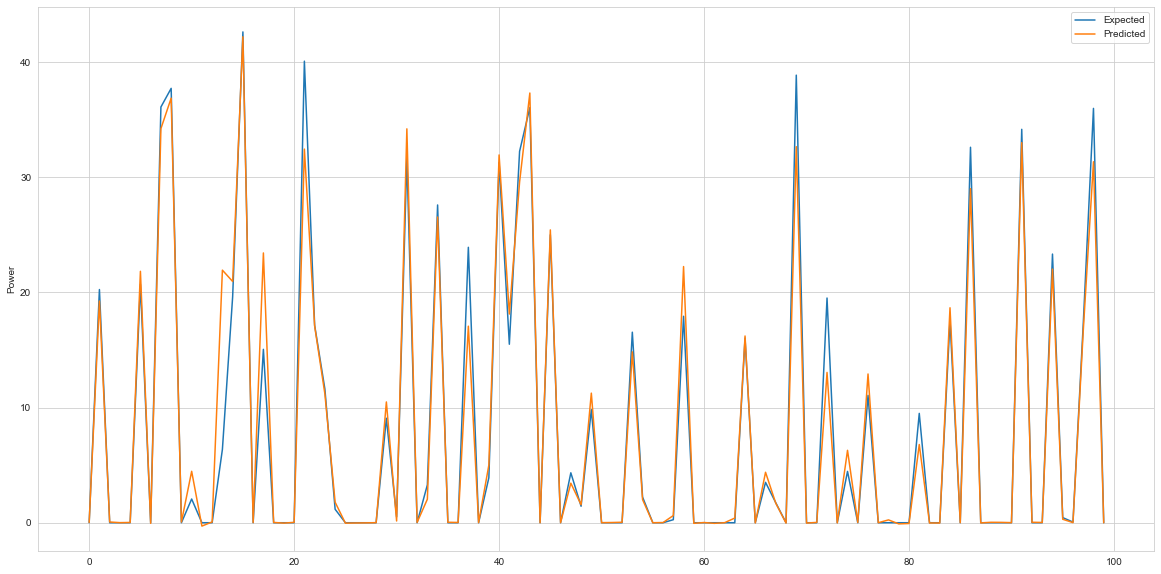

<Figure size 432x288 with 0 Axes>

In [69]:
import seaborn as sns
from matplotlib import pyplot
sns.set_style("whitegrid")
pyplot.figure(figsize=(20,10))
pyplot.plot(expectations[0:100], label="Expected")
pyplot.plot(predictions[0:100], label="Predicted")
pyplot.legend(loc='upper right')
pyplot.xlabel("")
pyplot.ylabel("Power")
pyplot.show()
plt.savefig('./XGBoost Solar Station1')

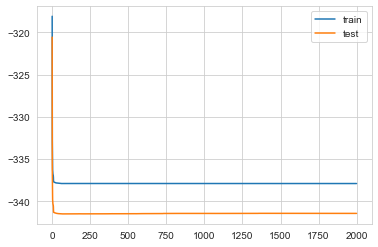

<Figure size 432x288 with 0 Axes>

In [70]:
results = model.evals_result()
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
plt.savefig('./LogLoss graph for XGBoost Solar Station  ')

In [71]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(expectations, predictions)

1.3911901465658318

In [72]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(expectations, predictions)

174393967748901.78

In [73]:
from sklearn.metrics import mean_squared_error
mean_squared_error(expectations, predictions)

9.802671119198504

In [74]:
import numpy as np

def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)
smape(expectations, predictions)

111.1978581214594